Compute what proportion of a paper exists in `'sent_original'` examples in the dataset

In [1]:
import pandas as pd

# Open reviews.jsonl and the nontrivial dataset
reviews_df = pd.read_json('../data/preprocessed/reviews.jsonl', lines=True)
dataset_df = pd.read_json('../data/dataset/nontrivial_checked.jsonl', lines=True)


In [2]:
# Build a unique index on reviews_df 'doi'
reviews_df.set_index('doi', inplace=True, verify_integrity=True)

# Build non-unique index on dataset_df 'source_doi'
dataset_df.set_index('source_doi', inplace=True)

In [16]:
from tqdm import tqdm

proportions = []
for row in tqdm(reviews_df.itertuples(), total=len(reviews_df)):
    doi = row.Index
    
    # Skip papers not in dataset_df
    if not doi in dataset_df.index:
        continue
    full_text_len = len(row.title) + len(row.abstract) + len(row.body)
    
    # Make sure full_text_len is not zero to avoid division by zero, but check these records
    if full_text_len == 0:
        print(f"Full text length is zero for DOI {doi}, skipping.")
        continue
    
    # Sum the length of all dataset 'sent_original' fields for this DOI, get proportion
    matched_rows = dataset_df.loc[[doi]]
    lengths = matched_rows['sent_original'].str.len()
    proportion = lengths.sum() / full_text_len
    proportions.append(proportion) 

100%|██████████| 2980/2980 [00:00<00:00, 5979.75it/s]


In [18]:
proportions_series = pd.Series(proportions)
proportions_series.describe()

count    354.000000
mean       0.058481
std        0.041517
min        0.000245
25%        0.024205
50%        0.051590
75%        0.082181
max        0.238637
dtype: float64

<Axes: >

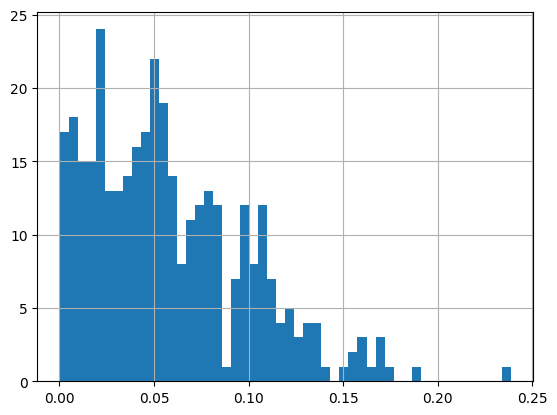

In [21]:
proportions_series.hist(bins=50)